In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
CoinName           1252 non-null object
Algorithm          1252 non-null object
IsTrading          1252 non-null bool
ProofType          1252 non-null object
TotalCoinsMined    744 non-null float64
TotalCoinSupply    1252 non-null object
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


In [5]:
df.TotalCoinSupply.describe()

count     1252
unique     546
top          0
freq        92
Name: TotalCoinSupply, dtype: object

In [6]:
# List all algorithms in use
algos = df["Algorithm"]
algos.unique()

array(['Scrypt', 'X11', 'SHA-256', 'X13', 'Ethash', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'NIST5', 'Quark',
       'Groestl', 'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Blake', 'Momentum', 'Stanford Folding', 'QuBit',
       'XG Hash', 'M7 POW', 'Curve25519', 'Lyra2RE', 'QUAIT', 'vDPOS',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'Dagger',
       'CryptoNight-Lite', 'X11GOST', 'ScryptOG', 'SHA-256D', 'POS 3.0',
       'Progressive-n', 'DPoS', 'Lyra2Z', 'X14', 'Time Travel', 'Argon2',
       'Keccak', 'Blake2S', 'Dagger-Hashimoto', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'YescryptR16', 'IMesh',
       'X16S', 'Green Protocol', 'Semux BFT consensus'

In [7]:
# print the counts of stocks being currently traded vs. not being currently traded 
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [9]:
# Select only cryptocurrencies that are being traded
df_traded = df[df["IsTrading"]==True]
df_traded["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [10]:
# Delete the IsTrading column; it is no longer necessary
df_data = df_traded.drop("IsTrading",axis=1)
df_data.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [12]:
df_data["Algorithm"].nunique()

89

In [14]:
# Delete all rows with null values
df_data.info()
df_data.dropna(subset=["TotalCoinsMined"] , inplace=True)

df_data.info()
df_data.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
CoinName           685 non-null object
Algorithm          685 non-null object
ProofType          685 non-null object
TotalCoinsMined    685 non-null float64
TotalCoinSupply    685 non-null object
dtypes: float64(1), object(4)
memory usage: 32.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
CoinName           685 non-null object
Algorithm          685 non-null object
ProofType          685 non-null object
TotalCoinsMined    685 non-null float64
TotalCoinSupply    685 non-null object
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [15]:
# Sort values in TotalCoinsMined to identify negative or zero values
df_data.sort_values(by=["TotalCoinsMined"],inplace=True)
df_data.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
FIII,Fiii,SHA3-256,DPoC,-5.917978e+09,5000000000
LBTC,LiteBitcoin,Scrypt,PoW,0.000000e+00,1000000000
RIPO,RipOffCoin,Scrypt,PoW,0.000000e+00,12000000
BASH,LuckChain,Scrypt,PoW/PoS,0.000000e+00,1000000000
CSH,CashOut,SHA-256,PoW,0.000000e+00,100000000


In [16]:
# Select only rows with positive TotalCoinsMined values
df_data_clean = df_data[df_data["TotalCoinsMined"] > 0]
df_data_clean.info()
df_data_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to BTT
Data columns (total 5 columns):
CoinName           532 non-null object
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null object
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,41.999954,42
MOON,MoonCoin,Scrypt,PoW,88.000000,384000000000
SYNC,SyncCoin,X11,PoW/PoS,1177.000000,1000
BTB,BitBar,Scrypt,PoW/PoS,42579.476901,500000
PLTC,PlatinCoin,CryptoNight,PoW,84300.000000,600000518


In [17]:
# Delete the CoinName column from the original dataframe
df_data_ready = df_data_clean.drop("CoinName",axis=1)
#df_data_clean.reset_index(drop=True,inplace=True)

df_data_ready.info()
df_data_ready.head()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to BTT
Data columns (total 4 columns):
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null object
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,41.999954,42
MOON,Scrypt,PoW,88.000000,384000000000
SYNC,X11,PoW/PoS,1177.000000,1000
BTB,Scrypt,PoW/PoS,42579.476901,500000
PLTC,CryptoNight,PoW,84300.000000,600000518


In [18]:
# Create dummy variables for columns with string values
df_data_ready_all = pd.get_dummies(df_data_ready,columns=['Algorithm','ProofType'])
df_data_ready_all.info()
df_data_ready_all.head()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to BTT
Data columns (total 98 columns):
TotalCoinsMined                     532 non-null float64
TotalCoinSupply                     532 non-null object
Algorithm_1GB AES Pattern Search    532 non-null uint8
Algorithm_536                       532 non-null uint8
Algorithm_Argon2d                   532 non-null uint8
Algorithm_BLAKE256                  532 non-null uint8
Algorithm_Blake                     532 non-null uint8
Algorithm_Blake2S                   532 non-null uint8
Algorithm_Blake2b                   532 non-null uint8
Algorithm_C11                       532 non-null uint8
Algorithm_Cloverhash                532 non-null uint8
Algorithm_Counterparty              532 non-null uint8
Algorithm_CryptoNight               532 non-null uint8
Algorithm_CryptoNight Heavy         532 non-null uint8
Algorithm_CryptoNight-V7            532 non-null uint8
Algorithm_Cryptonight-GPU           532 non-null uint8
Algorithm_DPoS  

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,41.999954,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MOON,88.000000,384000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SYNC,1177.000000,1000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTB,42579.476901,500000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
PLTC,84300.000000,600000518,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

arr_scaled = StandardScaler().fit_transform(df_data_ready_all)


[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [20]:
# print the scaled data
print(arr_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [21]:
# Identify the numbers of rows and columns in the scaled data
import numpy as np
import scipy.stats as stats
print(arr_scaled.shape)
stats.describe(arr_scaled)

(532, 98)


DescribeResult(nobs=532, minmax=(array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951, -0.72111026,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994

### Reduce dataset dimensions with PCA

In [22]:
# Reduce dimensions with PCA
# Applying PCA to reduce dimensions 
#For this project, preserve 90% of the explained variance in dimensionality reduction.
# Initialize PCA model
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
arr_pca = pca.fit_transform(arr_scaled)
arr_pca.shape

(532, 74)

In [23]:
pca_cols_arr = []
for i in range(74):
#    print(i)
    pca_cols_arr.append("Princ Comp" + str(i))
pca_cols_arr


['Princ Comp0',
 'Princ Comp1',
 'Princ Comp2',
 'Princ Comp3',
 'Princ Comp4',
 'Princ Comp5',
 'Princ Comp6',
 'Princ Comp7',
 'Princ Comp8',
 'Princ Comp9',
 'Princ Comp10',
 'Princ Comp11',
 'Princ Comp12',
 'Princ Comp13',
 'Princ Comp14',
 'Princ Comp15',
 'Princ Comp16',
 'Princ Comp17',
 'Princ Comp18',
 'Princ Comp19',
 'Princ Comp20',
 'Princ Comp21',
 'Princ Comp22',
 'Princ Comp23',
 'Princ Comp24',
 'Princ Comp25',
 'Princ Comp26',
 'Princ Comp27',
 'Princ Comp28',
 'Princ Comp29',
 'Princ Comp30',
 'Princ Comp31',
 'Princ Comp32',
 'Princ Comp33',
 'Princ Comp34',
 'Princ Comp35',
 'Princ Comp36',
 'Princ Comp37',
 'Princ Comp38',
 'Princ Comp39',
 'Princ Comp40',
 'Princ Comp41',
 'Princ Comp42',
 'Princ Comp43',
 'Princ Comp44',
 'Princ Comp45',
 'Princ Comp46',
 'Princ Comp47',
 'Princ Comp48',
 'Princ Comp49',
 'Princ Comp50',
 'Princ Comp51',
 'Princ Comp52',
 'Princ Comp53',
 'Princ Comp54',
 'Princ Comp55',
 'Princ Comp56',
 'Princ Comp57',
 'Princ Comp58',
 'Princ

In [24]:

df_crypto_pca = pd.DataFrame(
    data=arr_pca, columns=pca_cols_arr
)
df_crypto_pca.head()

,Princ Comp0,Princ Comp1,Princ Comp2,Princ Comp3,Princ Comp4,Princ Comp5,Princ Comp6,Princ Comp7,Princ Comp8,Princ Comp9,...,Princ Comp64,Princ Comp65,Princ Comp66,Princ Comp67,Princ Comp68,Princ Comp69,Princ Comp70,Princ Comp71,Princ Comp72,Princ Comp73
0,-0.335099,1.032189,-0.590713,0.001397,2.932946e-14,-1.110952e-14,-3.994161e-12,-0.007129,-1.319756,-0.051813,...,1.002753e-15,-1.924612e-15,-8.423217e-16,2.148346e-15,-3.520793e-16,3.481550e-16,1.559986e-15,-1.346436e-15,4.204699e-16,1.013149e-15
1,2.555181,-1.315308,-0.045412,0.003324,1.540454e-14,1.532441e-15,-9.549000e-12,-0.012376,-0.919844,-0.942203,...,-4.208638e-15,-3.486761e-15,-1.342541e-15,1.048965e-15,-1.574622e-15,1.766018e-15,2.684917e-15,3.268886e-15,-4.893632e-16,-1.458732e-15
2,-0.395704,1.237156,-0.517546,0.001434,2.586000e-14,-1.025226e-14,-4.102813e-12,-0.003500,-0.995159,0.143896,...,6.116672e-16,-8.871464e-16,-2.438847e-15,7.934946e-16,1.764621e-15,-2.483743e-15,-5.357965e-16,-1.124524e-15,1.335658e-15,-3.874808e-15
3,-0.335095,1.032189,-0.590713,0.001397,2.910407e-14,-1.132802e-14,-3.994098e-12,-0.007129,-1.319757,-0.051814,...,7.249409e-16,-2.013009e-15,-7.713624e-16,2.392432e-15,4.576647e-17,5.163317e-16,1.865330e-15,-1.595472e-15,3.008007e-16,8.816269e-16
4,0.306699,-2.312289,0.421925,-0.001311,-2.273899e-14,6.473420e-15,3.755220e-12,0.017896,0.164055,-0.042541,...,5.408839e-14,4.725548e-14,-2.679745e-14,-7.327070e-15,2.159961e-14,-8.054578e-14,-4.086466e-14,-6.985166e-14,1.167752e-14,2.773043e-14


In [25]:
# The sum of the explained variance of the principal components
sum(pca.explained_variance_ratio_)

0.9010870638268429

In [26]:
# Reduce dimensions with t-SNE


from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
df_data_ready_all.head()
tsne_df = df_data_ready_all
tsne_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,41.999954,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MOON,88.000000,384000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SYNC,1177.000000,1000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTB,42579.476901,500000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
PLTC,84300.000000,600000518,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Reduce dimensions
tsne_features = tsne.fit_transform(tsne_df)

In [28]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [29]:
# Prepare to plot the dataset

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

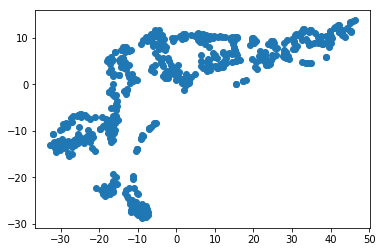

In [30]:
# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

In [31]:
# we will now use TSNE on the PCAed data
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
df_crypto_pca.head()
tsne_df = df_crypto_pca
tsne_df.head()

,Princ Comp0,Princ Comp1,Princ Comp2,Princ Comp3,Princ Comp4,Princ Comp5,Princ Comp6,Princ Comp7,Princ Comp8,Princ Comp9,...,Princ Comp64,Princ Comp65,Princ Comp66,Princ Comp67,Princ Comp68,Princ Comp69,Princ Comp70,Princ Comp71,Princ Comp72,Princ Comp73
0,-0.335099,1.032189,-0.590713,0.001397,2.932946e-14,-1.110952e-14,-3.994161e-12,-0.007129,-1.319756,-0.051813,...,1.002753e-15,-1.924612e-15,-8.423217e-16,2.148346e-15,-3.520793e-16,3.481550e-16,1.559986e-15,-1.346436e-15,4.204699e-16,1.013149e-15
1,2.555181,-1.315308,-0.045412,0.003324,1.540454e-14,1.532441e-15,-9.549000e-12,-0.012376,-0.919844,-0.942203,...,-4.208638e-15,-3.486761e-15,-1.342541e-15,1.048965e-15,-1.574622e-15,1.766018e-15,2.684917e-15,3.268886e-15,-4.893632e-16,-1.458732e-15
2,-0.395704,1.237156,-0.517546,0.001434,2.586000e-14,-1.025226e-14,-4.102813e-12,-0.003500,-0.995159,0.143896,...,6.116672e-16,-8.871464e-16,-2.438847e-15,7.934946e-16,1.764621e-15,-2.483743e-15,-5.357965e-16,-1.124524e-15,1.335658e-15,-3.874808e-15
3,-0.335095,1.032189,-0.590713,0.001397,2.910407e-14,-1.132802e-14,-3.994098e-12,-0.007129,-1.319757,-0.051814,...,7.249409e-16,-2.013009e-15,-7.713624e-16,2.392432e-15,4.576647e-17,5.163317e-16,1.865330e-15,-1.595472e-15,3.008007e-16,8.816269e-16
4,0.306699,-2.312289,0.421925,-0.001311,-2.273899e-14,6.473420e-15,3.755220e-12,0.017896,0.164055,-0.042541,...,5.408839e-14,4.725548e-14,-2.679745e-14,-7.327070e-15,2.159961e-14,-8.054578e-14,-4.086466e-14,-6.985166e-14,1.167752e-14,2.773043e-14


In [32]:
# Reduce dimensions
tsne_features = tsne.fit_transform(tsne_df)

In [33]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

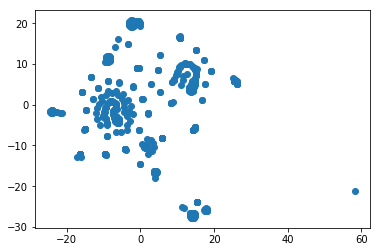

In [34]:
# Plot t-SNE output
# Prepare to plot the dataset

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()



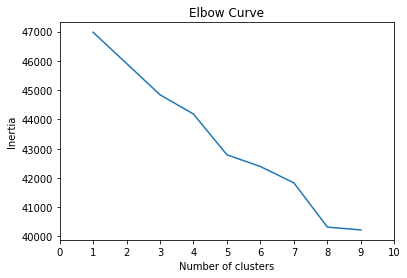

In [35]:
# Identify clusters with k-means


from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(arr_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
tsne_df.head()

,Princ Comp0,Princ Comp1,Princ Comp2,Princ Comp3,Princ Comp4,Princ Comp5,Princ Comp6,Princ Comp7,Princ Comp8,Princ Comp9,...,Princ Comp66,Princ Comp67,Princ Comp68,Princ Comp69,Princ Comp70,Princ Comp71,Princ Comp72,Princ Comp73,x,y
0,-0.335099,1.032189,-0.590713,0.001397,2.932946e-14,-1.110952e-14,-3.994161e-12,-0.007129,-1.319756,-0.051813,...,-8.423217e-16,2.148346e-15,-3.520793e-16,3.481550e-16,1.559986e-15,-1.346436e-15,4.204699e-16,1.013149e-15,13.297295,3.309309
1,2.555181,-1.315308,-0.045412,0.003324,1.540454e-14,1.532441e-15,-9.549000e-12,-0.012376,-0.919844,-0.942203,...,-1.342541e-15,1.048965e-15,-1.574622e-15,1.766018e-15,2.684917e-15,3.268886e-15,-4.893632e-16,-1.458732e-15,-9.057383,-4.852288
2,-0.395704,1.237156,-0.517546,0.001434,2.586000e-14,-1.025226e-14,-4.102813e-12,-0.003500,-0.995159,0.143896,...,-2.438847e-15,7.934946e-16,1.764621e-15,-2.483743e-15,-5.357965e-16,-1.124524e-15,1.335658e-15,-3.874808e-15,-3.142112,19.461897
3,-0.335095,1.032189,-0.590713,0.001397,2.910407e-14,-1.132802e-14,-3.994098e-12,-0.007129,-1.319757,-0.051814,...,-7.713624e-16,2.392432e-15,4.576647e-17,5.163317e-16,1.865330e-15,-1.595472e-15,3.008007e-16,8.816269e-16,13.388243,3.285063
4,0.306699,-2.312289,0.421925,-0.001311,-2.273899e-14,6.473420e-15,3.755220e-12,0.017896,0.164055,-0.042541,...,-2.679745e-14,-7.327070e-15,2.159961e-14,-8.054578e-14,-4.086466e-14,-6.985166e-14,1.167752e-14,2.773043e-14,-24.015802,-1.342546
